## Calculus

In [2]:
import mxnet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from mxnet import np, npx
npx.set_np()

#### 2.4.1 Derivatives and Differentiation

In Deep Learning, we typically choose loss functions that are differentiable with respect to our model's parameters. Put simply, **this means that for each parameter, we can determine how rapidly the loss would increase or decrease, were we to increase or decrease that parameter by INFINITESIMALLY small amount**

Suppose that we have a function $f$ : ${\rm I\!R}$ -> ${\rm I\!R}$, whose input and output are both scalars. The *derivative* of $f$ is defined as:

$f'(x)$ = $\displaystyle{\lim_{h \to 0} \frac{f(x + h) - f(x)}h}$

if this limit exists. If $f'(a)$ exists, $f$ is said to be **differentiable at a**. If $f$ is differentiable at every number of an interval, then this function is differentiable on this interval. We can interpret the derivative $f'(x)$ as the *instantaneous* rate of change of $f(x)$ **with respect to x**. The so-called instantaneous rate of change is based on the variation `h` in `x`, which approaches zero.

Let's experiment with derivatives. Define $u = f(x) = 3x^2 - 4x$

In [3]:
%matplotlib inline
import d2l
from IPython import display

In [4]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [31]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print("h=%.5f, numerical limit = %.5f" % (h, numerical_lim(f,1,h)))
    h *= 0.1

h=0.10000, numerical limit = 2.30000
h=0.01000, numerical limit = 2.03000
h=0.00100, numerical limit = 2.00300
h=0.00010, numerical limit = 2.00030
h=0.00001, numerical limit = 2.00003


Let's familiarize ourselves with a few equivalent notations for derivatives. Given $y =f(x)$, where $x$ and $y$ are the independent variable and the dependent variable of the function $f$, respectively. The following expressions are equivalent:

$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx}f(x) = Df(x) = D_xf(x)$

where symbols $\frac{d}{dx}$ and D are *differentiation operators* that indicate operation of *differentiation*. We can use the following rules to differentiate common functions:

- $DC = 0$ (C is a constant)
- $Dx^{n} = nx^{n-1}$ (the power rule, n is any real number)
- $De^x = e^x$
- $Dln(x) = 1 / x$

#### Constant multiple rule

$\frac{d}{dx}[Cf(x)] = C\frac{d}{dx}f(x)$

#### The sum rule

$\frac{d}{dx}[f(x) + g(x)] = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)$

#### The product rule

$\frac{d}{dx}[f(x)g(x)] = f(x)\frac{d}{dx}[g(x)] + g(x)\frac{d}{dx}[f(x)]$\fra

#### The quotient rule
$\frac{d}{{dx}}\left( {\frac{{f\left( x \right)}}{{g\left( x \right)}}} \right) = \frac{{\frac{d}{{dx}}f\left( x \right)g\left( x \right) - f\left( x \right)\frac{d}{{dx}}g\left( x \right)}}{{g^2 \left( x \right)}}$

Now we can apply a few of the above rules to find $u' = f'(x) = 3\frac{d}{dx}x^2 - 4\frac{d}{dx}x = 6x - 4$. Thus, by setting $x = 1$, we have $u' = 2$: this is supported by our earlier experiment in this section where the numerical result approaches 2. This derivative is also the slope of the tangent line to the curve $u = f(x)$ when $x = 1$

In [32]:
#### Helper functions to plot higher quality images

def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize = (3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()    

In [33]:
def plot(X, Y = None, xlabel = None, ylabel = None, legend = [],
        xlim = None, ylim = None, xscale = 'linear', yscale = 'linear',
        fmts = ['-', 'm--', 'g-.', 'r:'], figsize = (3.5,2.5), axes = None):
    d2l.set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    # Return True if X (ndarray or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list)
               and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

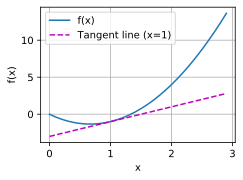

In [34]:
x = np.arange(0,3, 0.1)
plot(x, [f(x), 2*x - 3], 'x', 'f(x)', legend = ['f(x)', 'Tangent line (x=1)'])
# To see how the tangent line is calculated, see notes in (physical) red notebook

#### 2.4.2 Partial Derivatives
So far we have dealt with the differentiation of functions of just one variable. In deep learning, functions often depend on many variables. Thus, we need to extend the ideas of differentiation to these *multivariate* functions

Let $y=f(x_1,x_2,...,x_n)$ be a function with *n* variables. The *partial derivative* of $y$ with respect to its $i^{th}$ parameter $x_i$ is:



$\frac{\partial y}{\partial x_i} = \displaystyle{\lim_{h \to 0} \frac{f(x_1,...,x_{i-1},x_i + h, x_{i+1},...,x_n) - f(x_1,...,x_i,...,x_n)}h}$

#### 2.4.3 Gradients

We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain the *gradient* vector of the function. Suppose that the input of function $f : {\rm I\!R^n}$ -> ${\rm I\!R}$ is an n-dimensional vector $x = [x_1, x_2, ..., x_n]^T$ and the output is a scalar. The gradient of the function $f(x)$ with respect to **x** is a vector of n partial derivatives

#### 2.4.4 Chain Rule

However, such gradients can be hard to find. This is because multivariate functions in deep learning are often *composite*, so we may not apply any of the aforementioned rules to differentiate these functions. Fortunately, the *chain rule* enables us to differentiate composite functions.

Let's consider functions of a single variable. Suppose that functions $y = f(u$ and $u = g(x)$ are both differentiable, then the chain rule states that:

$\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}$

Now, let's turn our attention to a more general scenario where functions have an arbitrary number of variables. Suppose that the differentiable function $y$ has variables $u_1, u_2,...,u_m$, where each differentiable function $u_i$ has variables $x_1, x_2,...,x_n$. Note that $y$ is a function of $x_1, x_2,..., x_n$. Then the chain rule gives:

$\frac{dy}{dx_i} = \frac{dy}{du_1}\frac{du}{dx_i} + \frac{dy}{du_2}\frac{du_2}{dx_i} + ... + \frac{dy}{du_m}\frac{du_m}{dx_i}$

for any $i = 1,2,...,n$

#### Exercises

1) Plot the function $y = f(x) = x^3 - \frac{1}{x}$ and its tangent line when x = 1

In [35]:
def f(x):
    return x ** 3 - (1 / x)

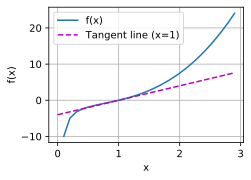

In [39]:
x = np.arange(0,3, 0.1)
plot(x, [f(x), 4*x - 4], 'x', 'f(x)', legend = ['f(x)', 'Tangent line (x=1)'])

#### 2.5 Automatic Differentiation
As we have explained in Section 2.4, differentiation is a crucial step in nearly all deep learning optimization algorithms. While the calculations for taking these derivatives are straightforward, requiring only some basic calculus, for complex models, working out the updates by hand can be a pain (and often error-prone).

The autograd package expedites this work by automatically calculating derivatives, i.e., automatic differentiation. And while many other libraries require that we compile a symbolic graph to take automatic derivatives, autograd allows us to take derivatives while writing ordinary imperative code. Every time we pass data through our model, autograd builds a graph on the fly, tracking which data combined through which operations to produce the output. This graph enables auto- grad to subsequently backpropagate gradients on command. Here, backpropagate simply means **to trace through the computational graph, filling in the partial derivatives with respect to each parameter.**

In [40]:
from mxnet import autograd

As a toy example, say that we are interested in differentiating the function $y = 2x^Tx$ with respect to the column vector **x**. To start, let's create a variable x and assign it an initial value:

In [41]:
x = np.arange(4)
x

array([0., 1., 2., 3.])

Note that before we even calculate the gradient of y with respect to x, we will need a place to store it. It is important that we do not allocate new memory every time we take a derivative with respect to a parameter because we will often update the same parameters thousands or millions of times and could quickly run out of memory.

Note also that a gradient of a scalar-valued function with respect to a vector x is itself vector-valued and has the same shape as x. Thus it is intuitive that in code, we will access a gradient taken with respect to x as an attribute of the ndarray x itself. We allocate memory for an ndarrayʼs gradient by invoking its attach_grad method.

In [42]:
x.attach_grad()

In [43]:
x.grad

array([0., 0., 0., 0.])

In [44]:
with autograd.record():
    y = 2 * np.dot(x,x)
y

array(28.)

In [45]:
np.dot(x,x)

array(14.)

In [46]:
y.backward()

In [47]:
x.grad

array([ 0.,  4.,  8., 12.])

The gradient of a function $y = 2x^Tx$ should be $4x$. Let's quickly verify that our desired gradient was calculated properly. If the two ndarrays are indeed the same, then the equality between them holds at every position.

In [49]:
x.grad == 4 * x

array([ True,  True,  True,  True])

In [50]:
with autograd.record():
    y = x.sum()
y.backward()
x.grad

array([1., 1., 1., 1.])

#### Backward for Non-Scalar Variables 

In [52]:
with autograd.record():
    y = x * x # y is a vector
y.backward()

In [54]:
u = x.copy()

u.attach_grad()

with autograd.record():
    v = (u * u).sum() # v is a scalar
v.backward()

In [56]:
v

array(14.)

#### 2.5.3 Detaching Computation
Sometimes, we wish to move some calculations outside of the recorded computational graph. For example, say that `y` was calculated as a function of `x`, and that subsequently `z` was calculated as a function of both `y` and `x`. Now, imagine that we wanted to calculate the gradient of `z` with respect to `x`, but wanted for some reason to treat `y` as a constant, and only take into account the role that `x` played after `y` was calculated.

Here, we can call `u = y.detach()` to return a new variable u that has the same value as y but discards any information about how y was computed in the computational graph. In other words, the gradient will not flow backwards through u to x. This will provide the same functionality as if we had calculated u as a function of x outside of the autograd.record scope, yielding a u that will be treated as a constant in any backward call. Thus, the following backward function computes the partial derivative of `z = u * x` with respect to x while treating u as a constant, instead of the partial derivative of `z = x * x * x` with respect to x.

In [57]:
with autograd.record():
    y = x * x
    u = y.detach()
    z = u * x
z.backward()

In [59]:
x.grad == u

array([ True,  True,  True,  True])

In [60]:
y.backward()
x.grad == 2 * x

array([ True,  True,  True,  True])

In [63]:
y = np.ones(4) * 2
y.attach_grad()

with autograd.record():
    u = x * y
    u.attach_grad() # implicitly run u = u.detach()
    z = 5 * u - x
z.backward()
x.grad, u.grad, y.grad

(array([-1., -1., -1., -1.]), array([5., 5., 5., 5.]), array([0., 0., 0., 0.]))

#### 2.5.4 Computing the Gradient of Python Control Flow

In [64]:
def f(a):
    b = a * 2
    while np.linalg.norm(b) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [78]:
a = np.random.normal()
a.attach_grad()
with autograd.record():
    d = f(a)
d.backward()

In [68]:
a.grad == d / a

array(True)

#### 2.5.5 Training Mode and Prediction Mode

In [69]:
print(autograd.is_training())
with autograd.record():
    print(autograd.is_training())

False
True


### Exercise
Let $f(x) = sin(x)$. Plot $f(x)$ and $\frac{df(x)}{dx}$, where the latter is computed without exploiting that $f'(x) = cos(x)$.

In [ ]:
def deriv(func, 
          input_,
          sigma = 0.001):
    return (func(input_ + sigma) - func(input_)) / sigma

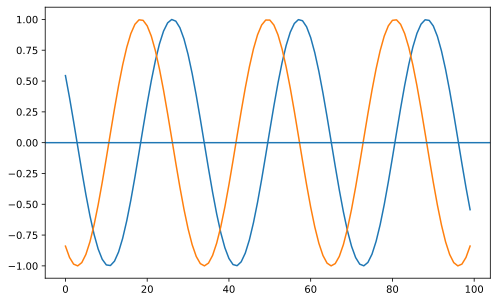

In [116]:
plt.figure(figsize = (8,5))
b = np.linspace(-10,10, 100)
plt.plot(np.sin(b))
plt.plot(deriv(np.sin, b))
plt.axhline()

In [ ]:
plt.